In [1]:
import recipe
import db
import svd

In [2]:
data1 = recipe.load_recipe(n = 100)
data2 = recipe.recipe_preprocessing(data1)
data3 = recipe.split_ingredient(data2)

100%|██████████| 96/96 [00:00<00:00, 2820.73it/s]


In [4]:
data3

,recipe_title,recipe_ingredients,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,...,unit71,ingredient72,quantity72,unit72,ingredient73,quantity73,unit73,ingredient74,quantity74,unit74
0,호박 새우젓찌개 만드는 방법~★,"{'재료': ['둥근호박1개', '청양고추3개', '당근약간', '실파약간', '새...",둥근호박,1,개,청양고추,3,개,당근약간,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,바글바글 전복 된장찌개,"{'재료': ['된장1스푼', '전복'], '부재료와 양념': ['양파1/2개', ...",된장,1,스푼,전복,,None,양파,1/2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,순두부찌개....오도독 씹히는 미더덕이 들어간 순두부찌개!!,"{'재료': ['순두부(연두부)', '바지락30g', '미더덕30g', '멸치육수(...",순두부(연두부),,None,바지락,30,g,미더덕,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,정통 바지락 순두부 찌개,"{'주재료': ['순두부1봉', '바지락100g', '양파50g', '애호박10g'...",순두부,1,봉,바지락,100,g,양파,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,크림토마토 비프 스튜,"{'주재료': ['쇠고기등심250g', '파프리카1개', '양파1/3개', '마늘2...",쇠고기등심,250,g,파프리카,1,개,양파,1/3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,달달한 바나나와 오도독 아몬드가 씹히는 치지한 치즈토스트,"{'재료': ['아몬드2줌', '바나나1개', '모짜렐라치즈적당량', '슬라이스치즈...",아몬드,2,줌,바나나,1,개,모짜렐라치즈적당량,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,노란색 양배추전 # 치즈전,"{'재료': ['양배추1조각', '양파1/4개', '당근1조각', '돗나물3T', ...",양배추,1,조각,양파,1/4,개,당근,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,아이들도 좋아하는 단맛 가득한 양배추 볶음밥,"{'재료': ['밥1공기', '양배추150g', '소시지1개', '연두순1숟가락',...",밥,1,공기,양배추,150,g,소시지,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,추운 겨울 따듯함을 담은 달콤함 ' 꿀고구마 찹쌀전',"{'재료': ['흙애서꿀고구마1개', '찹쌀가루적당량', '올리브유약간', '꿀2~...",흙애서꿀고구마,1,개,찹쌀가루적당량,,None,올리브유약간,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
num_ingredients = 10
import pandas as pd

list = [[f'ingredient{i}', f'quantity{i}', f'unit{i}'] for i in range(1, num_ingredients + 1)]
col = []
for i in list :
    col.extend(i)
pd.DataFrame(columns = col)

,ingredient1,quantity1,unit1,ingredient2,quantity2,unit2,ingredient3,quantity3,unit3,ingredient4,...,unit7,ingredient8,quantity8,unit8,ingredient9,quantity9,unit9,ingredient10,quantity10,unit10


In [4]:
data3

,recipe_ingredients,recipe_title,ingredient9,ingredient19,ingredient29,ingredient39,ingredient49,ingredient59,ingredient69,quantity9,...,quantity50,quantity60,quantity70,unit10,unit20,unit30,unit40,unit50,unit60,unit70
0,"{'재료': ['둥근호박1개', '청양고추3개', '당근약간', '실파약간', '새...",호박 새우젓찌개 만드는 방법~★,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'재료': ['된장1스푼', '전복'], '부재료와 양념': ['양파1/2개', ...",바글바글 전복 된장찌개,두부작은것,NaN,NaN,NaN,NaN,NaN,NaN,1/2,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'재료': ['순두부(연두부)', '바지락30g', '미더덕30g', '멸치육수(...",순두부찌개....오도독 씹히는 미더덕이 들어간 순두부찌개!!,달걀,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'주재료': ['순두부1봉', '바지락100g', '양파50g', '애호박10g'...",정통 바지락 순두부 찌개,홍고추,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,개,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'주재료': ['쇠고기등심250g', '파프리카1개', '양파1/3개', '마늘2...",크림토마토 비프 스튜,올리브유적당량,NaN,NaN,NaN,NaN,NaN,NaN,,...,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"{'재료': ['아몬드2줌', '바나나1개', '모짜렐라치즈적당량', '슬라이스치즈...",달달한 바나나와 오도독 아몬드가 씹히는 치지한 치즈토스트,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,"{'재료': ['양배추1조각', '양파1/4개', '당근1조각', '돗나물3T', ...",노란색 양배추전 # 치즈전,달걀,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN
97,"{'재료': ['밥1공기', '양배추150g', '소시지1개', '연두순1숟가락',...",아이들도 좋아하는 단맛 가득한 양배추 볶음밥,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,"{'재료': ['흙애서꿀고구마1개', '찹쌀가루적당량', '올리브유약간', '꿀2~...",추운 겨울 따듯함을 담은 달콤함 ' 꿀고구마 찹쌀전',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
import matplotlib.pyplot as plt

In [7]:
nutri = recipe.select_table('select * from nutrient_data_table')

In [11]:
nutri

,nutrient,수분,에너지(kcal),에너지(kj),단백질,지방,회분,탄수화물,"섬유질, 식이섬유",당,...,델타-5-아베나스테롤,델타-7-스티그마스테롤,에르고티오네인,요오드,"tfa 18:2 t,t",pufa 20:4 n-6,"탄수화물, 합계","섬유질, 수용성","섬유질, 불용성",mufa 18:1-11 t (18:1t n-7)
0,당근채,88.3g,41kcal,173kJ,0.93g,0.24g,0.97g,9.58g,2.8g,4.74g,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,크래커,3.14g,510kcal,2130kJ,6.64g,26.4g,2.49g,61.3g,2.3g,8.18g,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,럼,66.6g,231kcal,967kJ,0g,0g,0.01g,0g,0g,0g,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,현미,70.3g,123kcal,514kJ,2.74g,0.97g,0.44g,25.6g,1.6g,0.24g,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,냉동블루베리,84.2g,57kcal,240kJ,0.74g,0.33g,0.24g,14.5g,2.4g,9.96g,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,노랑파프리카,11.2g,282kcal,1180kJ,14.1g,12.9g,7.74g,54g,34.9g,10.3g,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
796,바지락,nan,67kcal,280kJ,11.63g,0.88g,nan,2.34g,0,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
797,참치캔,nan,210kcal,879kJ,19.00g,15.00g,nan,0,0,0,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
798,굴,64.7g,199kcal,832kJ,8.77g,12.6g,1.72g,11.6g,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [41]:
nutri[nutri == "0g"] = 0
nutri[nutri=='nan'] = 0

In [42]:
data = (nutri == 0).sum()

In [ ]:
data

In [43]:
data[data > 750]

유당                            776
엿당                            761
갈락토스                          759
sfa 4:0                       769
sfa 6:0                       768
                             ... 
pufa 20:4 n-6                 800
탄수화물, 합계                      799
섬유질, 수용성                      799
섬유질, 불용성                      799
mufa 18:1-11 t (18:1t n-7)    798
Length: 67, dtype: int64

420.0

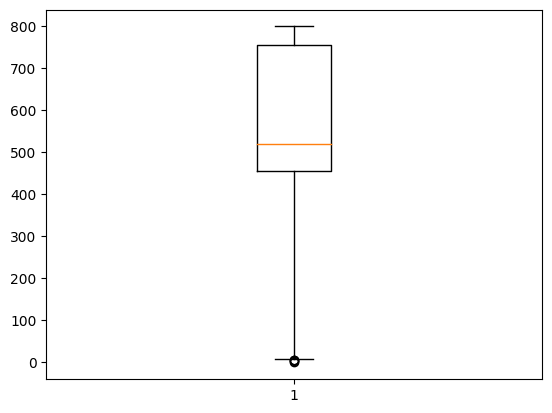

In [23]:

plt.boxplot(data)

import numpy as np

np.quantile(data, 0.10)

100%|██████████| 9411/9411 [00:02<00:00, 3703.09it/s]


29.60699999999997

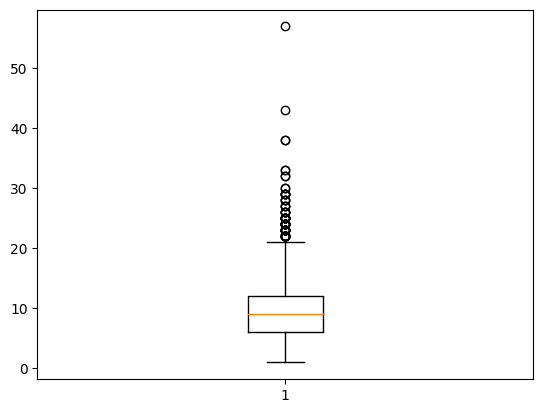

In [3]:
import matplotlib.pyplot as plt
import recipe
import db
import svd

data = recipe.load_recipe(n=10000)
data2 =  recipe.recipe_preprocessing(data)
data3 = recipe.split_ingredient(data2)

column_names = [f'ingredient{i}' for i in range(1, 75)]

num_ingre = data3[column_names].count(axis = 1)
plt.boxplot(num_ingre)

import numpy as np

np.quantile(num_ingre, 0.999)

In [44]:
im, nm = svd.two_matrix(200) # im : 레시피-식재료(ingredient) nm: 레시피-영양소(nutrient) 매트릭스


100%|██████████| 189/189 [00:00<00:00, 3215.20it/s]
c:\Users\kwon\github\recipe-1\models\recipe.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_recipe1.loc[:, f'multi{i}'] = None
c:\Users\kwon\github\recipe-1\models\recipe.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_recipe1.loc[:, f'multi{i}'] = None
c:\Users\kwon\github\recipe-1\models\recipe.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

칼럼 수 변화: 572 -> 403
행의 수 변화: 189 -> 189
칼럼 수 변화: 176 -> 164
행의 수 변화: 189 -> 189
ingred matrix saved
nutrition matrix saved


c:\Users\kwon\github\recipe-1\models\recipe.py:400: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_recipe1[nutrient_list1] = 0
c:\Users\kwon\github\recipe-1\models\recipe.py:400: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_recipe1[nutrient_list1] = 0
c:\Users\kwon\github\recipe-1\models\recipe.py:400: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

In [ ]:
import 

189개의 레시피, 381개의 식재료 -> 100차원으로 재표현 완료


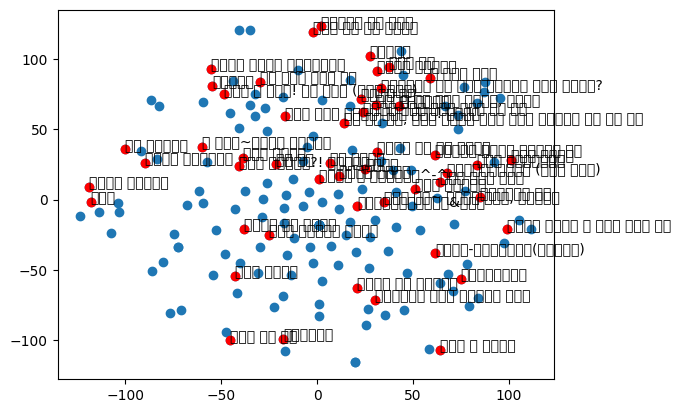

In [4]:
svd.svd_tsne(im)

1858개의 레시피, 1863개의 식재료 -> 100차원으로 재표현 완료


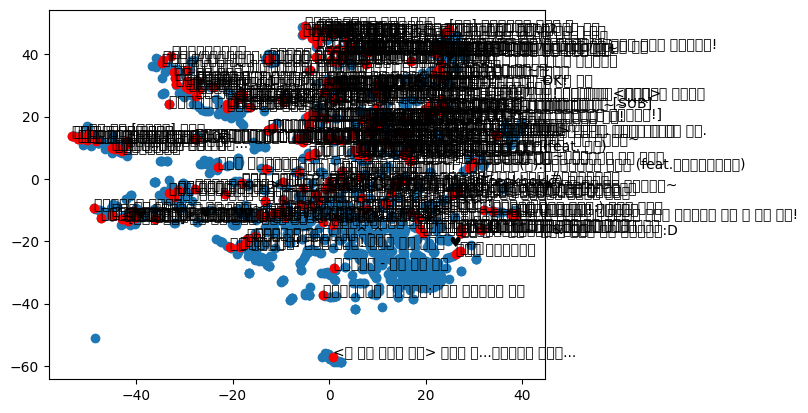

In [2]:
svd.svd_tsne(im)

In [37]:
title, rec_vec, ingre_vec = svd.matrix_decomposition(im, n= 100)

1858개의 레시피, 1863개의 식재료 -> 100차원으로 재표현 완료


In [38]:
import pickle

data = dict(zip(title, rec_vec))
with open('vector/recipe_vector_2000.p', 'wb') as f:
    pickle.dump(data ,f)

data = dict(zip(title, rec_vec))

In [39]:
with open('vector/recipe_vector_2000.p', 'rb') as f:
    test = pickle.load(f)

In [ ]:
im = pd.read_csv(r'matrix\ingred_matrix_1000_1210-1020.csv')
nm = pd.read_csv(r'matrix\nutri_matrix_1000_1210-1020.csv')
im.drop(columns='Unnamed: 0', inplace= True)
nm.drop(columns='Unnamed: 0', inplace= True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
def normalizing(df):
    if 'recipe_title' in df.columns :
        df = df.drop('recipe_title', axis =1).copy()
    else : 
        pass
    # 칼럼을 정규화
    for col in df.columns:
        data = df[col]
        min = data.min()
        max = data.max()
        df[col] = (data-min)/(max-min)
    return df

matrix_norm = normalizing(matrix_reduced)

In [55]:
from konlpy.tag import Komoran
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec
import tqdm

In [54]:
data = recipe.load_recipe(n =100) 
step = data[['recipe_step', 'recipe_step']]

okt = Okt()
tagged_corpus_list = []
cleaned_tagged_corpus_list = []



JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

In [ ]:
for index, row in tqdm(data.iterrows(), total=len(step)):
    cleaned_text = re.sub(r'[^A-Za-z0-9가-힣\s]+', '', str(row['recipe_step']))
    words = okt.morphs(cleaned_text)
    tag = row['recipe_title']

    # recipe_step의 길이가 0이 아니면 다음 작업을 수행합니다.
    if len(words) != 0:
        tagged_corpus_list.append(TaggedDocument(words=words, tags=[tag]))


In [46]:
model = doc2vec.Doc2Vec(vector_size=300, alpha=0.025, min_alpha=0.025, workers=8, window=8)
model.build_vocab(tagged_corpus_list)


import konlpy 

0     ['#1 먼저 둥근호박 하나를 반달썰기로 썰어 냄비에 넣고', '#2 새우젓 1/2...
1     ['#1 된장 한 큰 술 넣어주었어요.', '#2 전복 듬뿍, 양파 1/2개, 둥근...
2                                                    []
3     ['#1 뚝배기에 양파,다진 마늘,바지락을 넣어 중불에서 살짝 볶는다.', '#2 ...
4     ['#1 쇠고기는 2cm 크기로 네모나게 썰어 소금과 후추로 밑간한다.', '#2 ...
                            ...                        
95    ['#1 아몬드는 듬성듬성 절구로 잘라 주세요 도마에 서너번 다져도 됩니다 바나나를...
96    ['#1 고추는 잘게 다지고 야채는 채썬 다음 2~3cm 길이로 썰어 주세요', '...
97    ['#1 양배추는 얇게 채 썰어주시고, 소시지는 둥글게 슬라이스해주세요.양배추 겉잎...
98    ['#1 흙애서 찹쌀가루!', '#2 그리고 꿀고구마! 호박고구마 맛도 나면서 밤 ...
99    ['#1 각각의 재료를 준비한다.', '#2 냄비에 고구마, 천일염, 물 3컵을 넣...
Name: recipe_step, Length: 100, dtype: object